In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("seattle_incidents_summer_2014.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32774,997623,2014172059,2204,0,BURGLARY-NOFORCE-RES,2200,BURGLARY,06/01/2014 12:30:00 AM,06/01/2014 12:30:00 AM,NaN,91XX BLOCK OF AURORA AV N,N,N2,1800.3007,-122.344578,47.695272,"(47.695271832, -122.344577872)",6,2014
32775,1018880,2014172055,X,98,[INC - CASE DC USE ONLY],X,[INC - CASE DC USE ONLY],06/01/2014 12:26:00 AM,06/01/2014 12:26:00 AM,NaN,22XX BLOCK OF E MARGINAL WY S,K,K3,9300.2038,-122.340006,47.584263,"(47.584262543, -122.340005594)",6,2014
32776,58270,2014172048,1305,0,ASSLT-AGG-WEAPON,1300,ASSAULT,06/01/2014 12:22:00 AM,06/01/2014 12:22:00 AM,NaN,LOYAL WY NW / 31 AV NW,J,J2,3100.5013,-122.396942,47.689268,"(47.689268482, -122.396941815)",6,2014
32777,990051,2014172048,1305,0,ASSLT-AGG-WEAPON,1300,ASSAULT,06/01/2014 12:22:00 AM,06/01/2014 12:22:00 AM,NaN,LOYAL WY NW / 31 AV NW,B,B2,3100.6003,-122.396942,47.689268,"(47.689268482, -122.396941815)",6,2014


In [68]:
colnew = []
for i in df["Occurred Date or Date Range Start"]:
    colnew.append(i.split(" ")[0])

df["Start Date"] = colnew

In [69]:
df

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Start Date
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,06/28/2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014,06/01/2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014,08/31/2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014,06/20/2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014,06/01/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32774,997623,2014172059,2204,0,BURGLARY-NOFORCE-RES,2200,BURGLARY,06/01/2014 12:30:00 AM,06/01/2014 12:30:00 AM,NaN,91XX BLOCK OF AURORA AV N,N,N2,1800.3007,-122.344578,47.695272,"(47.695271832, -122.344577872)",6,2014,06/01/2014
32775,1018880,2014172055,X,98,[INC - CASE DC USE ONLY],X,[INC - CASE DC USE ONLY],06/01/2014 12:26:00 AM,06/01/2014 12:26:00 AM,NaN,22XX BLOCK OF E MARGINAL WY S,K,K3,9300.2038,-122.340006,47.584263,"(47.584262543, -122.340005594)",6,2014,06/01/2014
32776,58270,2014172048,1305,0,ASSLT-AGG-WEAPON,1300,ASSAULT,06/01/2014 12:22:00 AM,06/01/2014 12:22:00 AM,NaN,LOYAL WY NW / 31 AV NW,J,J2,3100.5013,-122.396942,47.689268,"(47.689268482, -122.396941815)",6,2014,06/01/2014
32777,990051,2014172048,1305,0,ASSLT-AGG-WEAPON,1300,ASSAULT,06/01/2014 12:22:00 AM,06/01/2014 12:22:00 AM,NaN,LOYAL WY NW / 31 AV NW,B,B2,3100.6003,-122.396942,47.689268,"(47.689268482, -122.396941815)",6,2014,06/01/2014


In [79]:
a = dict()
b = dict()

def getOffence(off, di, data=df):
    for i in data[off].values:
        if i in di:
            di[i] += 1
        if i not in di:
            di[i] = 1
    return di

In [80]:
a = getOffence("Offense Type", a)
b = getOffence('Summarized Offense Description', b)

In [81]:
a

{'BURGLARY-FORCE-RES': 1147,
 'FRAUD-IDENTITY THEFT': 458,
 'THEFT-MAIL': 264,
 'COUNTERFEIT': 159,
 'THEFT-OTH': 2221,
 'THEFT-BUILDING': 846,
 'FRAUD-CREDIT CARD': 443,
 'FRAUD-CHECK': 241,
 'EMBEZZLE': 57,
 'BURGLARY-NOFORCE-NONRES': 372,
 'FRAUD-OTHER': 288,
 'THEFT-CARPROWL': 6230,
 'HARASSMENT': 523,
 'THEFT-AUTOACC': 252,
 'BURGLARY-NOFORCE-RES': 1118,
 'PROPERTY DAMAGE-NON RESIDENTIA': 1638,
 'THEFT-LICENSE PLATE': 358,
 'PROPERTY LOST': 149,
 'FORGERY-CHECK': 52,
 'VEH-THEFT-AUTO': 2588,
 'BURGLARY-SECURE PARKING-RES': 388,
 'THEFT-PKPOCKET': 146,
 'THREATS-OTHER': 389,
 'PROPERTY LOST - POLICE EQUIPME': 13,
 'THEFT-BICYCLE': 797,
 'VEH-RCVD-FOR OTHER AGENCY': 170,
 'VEH-THEFT-MTRCYCLE': 135,
 'NARC-SELL-HEROIN': 15,
 'DISPUTE-CIVIL PROPERTY (NON AU': 49,
 'VEH-THEFT-TRAILER': 23,
 'ASSLT-AGG-WEAPON': 421,
 'PROPERTY FOUND': 1069,
 'THREATS-KILL': 208,
 'DISPUTE-OTH': 107,
 'WARRARR-MISDEMEANOR': 416,
 'ASSLT-AGG-BODYFORCE': 140,
 'PROPERTY DAMAGE-RESIDENTIAL': 419,
 'VEH-THEF

In [82]:
b

{'BURGLARY': 3212,
 'FRAUD': 1473,
 'MAIL THEFT': 264,
 'COUNTERFEIT': 159,
 'OTHER PROPERTY': 3755,
 'EMBEZZLE': 57,
 'CAR PROWL': 6230,
 'THREATS': 1178,
 'PROPERTY DAMAGE': 2365,
 'LOST PROPERTY': 162,
 'FORGERY': 59,
 'VEHICLE THEFT': 3057,
 'BURGLARY-SECURE PARKING-RES': 388,
 'PICKPOCKET': 146,
 'BIKE THEFT': 797,
 'NARCOTICS': 391,
 'DISPUTE': 171,
 'ASSAULT': 2018,
 'STOLEN PROPERTY': 1136,
 'WARRANT ARREST': 1021,
 'TRAFFIC': 252,
 'SHOPLIFTING': 944,
 'DISTURBANCE': 1333,
 'VIOLATION OF COURT ORDER': 90,
 'ILLEGAL DUMPING': 26,
 'PROSTITUTION': 202,
 'ROBBERY': 736,
 'TRESPASS': 486,
 'LIQUOR VIOLATION': 48,
 'BIAS INCIDENT': 20,
 'THEFT OF SERVICES': 96,
 'HOMICIDE': 8,
 'RECOVERED PROPERTY': 34,
 'OBSTRUCT': 38,
 'RECKLESS BURNING': 23,
 'INJURY': 71,
 'WEAPON': 137,
 'PURSE SNATCH': 9,
 'FALSE REPORT': 23,
 'ELUDING': 8,
 'ANIMAL COMPLAINT': 96,
 'PORNOGRAPHY': 3,
 'DUI': 34,
 'FIREWORK': 9,
 '[INC - CASE DC USE ONLY]': 5,
 'PUBLIC NUISANCE': 4,
 'DISORDERLY CONDUCT': 2,
 

In [57]:
def graphicize(dic):
    listkeys = []
    retlist = [[], []]
    num = 1
    for key in dic:
        if (key, num) not in listkeys:
            listkeys.append((key, num))
        retlist[0].append(num)
        retlist[1].append(dic[key])
        num += 1
    return retlist[0], retlist[1], listkeys

In [58]:
x_bar, h_bar, keys = graphicize(b)

In [62]:
for i in keys:
    print(i[0], end=": ")
    print(i[1])

BURGLARY: 1
FRAUD: 2
MAIL THEFT: 3
COUNTERFEIT: 4
OTHER PROPERTY: 5
EMBEZZLE: 6
CAR PROWL: 7
THREATS: 8
PROPERTY DAMAGE: 9
LOST PROPERTY: 10
FORGERY: 11
VEHICLE THEFT: 12
BURGLARY-SECURE PARKING-RES: 13
PICKPOCKET: 14
BIKE THEFT: 15
NARCOTICS: 16
DISPUTE: 17
ASSAULT: 18
STOLEN PROPERTY: 19
WARRANT ARREST: 20
TRAFFIC: 21
SHOPLIFTING: 22
DISTURBANCE: 23
VIOLATION OF COURT ORDER: 24
ILLEGAL DUMPING: 25
PROSTITUTION: 26
ROBBERY: 27
TRESPASS: 28
LIQUOR VIOLATION: 29
BIAS INCIDENT: 30
THEFT OF SERVICES: 31
HOMICIDE: 32
RECOVERED PROPERTY: 33
OBSTRUCT: 34
RECKLESS BURNING: 35
INJURY: 36
WEAPON: 37
PURSE SNATCH: 38
FALSE REPORT: 39
ELUDING: 40
ANIMAL COMPLAINT: 41
PORNOGRAPHY: 42
DUI: 43
FIREWORK: 44
[INC - CASE DC USE ONLY]: 45
PUBLIC NUISANCE: 46
DISORDERLY CONDUCT: 47
ESCAPE: 48


<BarContainer object of 48 artists>

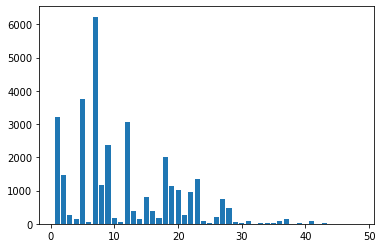

In [63]:
plt.bar(x_bar, h_bar)

In [71]:
distloopvals = df["District/Sector"].values
c = dict()
for i in distloopvals:
    if i not in c:
        c[i] = 1
    else:
        c[i] += 1

print(c)

{'J': 2204, 'C': 1680, 'F': 1594, 'M': 2642, 'R': 1841, 'Q': 1805, 'B': 2338, 'D': 2063, 'E': 2255, 'L': 1982, 'N': 2333, 'S': 1607, 'U': 2160, 'W': 1324, 'G': 1394, 'K': 2379, '99': 40, 'O': 1081, nan: 57}


In [91]:
def distloops(loopdict, df):
    for i in loopdict:
        a = dict()
        tempdf = df[df["District/Sector"] == i]
        a = getOffence("Summarized Offense Description", a, tempdf)
        print("District " + i, end=":\n")
        print(a)
        num = 0
        for key in a:
            num += a[key]
        print("Total Crime: ", end="")
        print(num)
        percentcrime = num / len(df["Summarized Offense Description"])
        print("Percent Crime: ", end="")
        print(percentcrime * 100)
        print()

In [92]:
distloops(c, df)

District J:
{'BURGLARY': 253, 'OTHER PROPERTY': 276, 'MAIL THEFT': 25, 'FRAUD': 116, 'CAR PROWL': 435, 'VEHICLE THEFT': 349, 'PROPERTY DAMAGE': 146, 'BIKE THEFT': 83, 'ASSAULT': 83, 'LOST PROPERTY': 4, 'STOLEN PROPERTY': 62, 'THREATS': 69, 'DISTURBANCE': 71, 'TRESPASS': 26, 'ROBBERY': 20, 'SHOPLIFTING': 33, 'WARRANT ARREST': 21, 'ILLEGAL DUMPING': 2, 'PURSE SNATCH': 1, 'NARCOTICS': 4, 'TRAFFIC': 11, 'COUNTERFEIT': 7, 'ELUDING': 3, 'INJURY': 8, 'BURGLARY-SECURE PARKING-RES': 46, 'ANIMAL COMPLAINT': 6, 'EMBEZZLE': 3, 'VIOLATION OF COURT ORDER': 9, 'RECOVERED PROPERTY': 3, 'THEFT OF SERVICES': 2, 'LIQUOR VIOLATION': 8, 'HOMICIDE': 1, 'RECKLESS BURNING': 1, 'OBSTRUCT': 1, 'DISPUTE': 9, 'FIREWORK': 1, 'WEAPON': 2, 'DUI': 1, 'PROSTITUTION': 2, 'FALSE REPORT': 1}
Total Crime: 2204
Percent Crime: 6.723817078007261

District C:
{'FRAUD': 98, 'BURGLARY': 144, 'OTHER PROPERTY': 179, 'PICKPOCKET': 16, 'DISPUTE': 3, 'STOLEN PROPERTY': 94, 'BIKE THEFT': 48, 'CAR PROWL': 385, 'VEHICLE THEFT': 166, 'P

TypeError: can only concatenate str (not "float") to str